# Симплекс алгоритъм {#sec-simplex}

[George Danzig и оптималните диети](https://resources.mpi-inf.mpg.de/departments/d1/teaching/ws14/Ideen-der-Informatik/Dantzig-Diet.pdf)

![George Danzig](https://news.stanford.edu/__data/assets/image/0016/82501/Dantzig_vertical.jpeg){width=80%}

![IBM 701 Console](https://upload.wikimedia.org/wikipedia/commons/a/af/IBM_701console.jpg){width=80%}

![IBM 701 Memory](https://upload.wikimedia.org/wikipedia/commons/5/5b/IBM_700_logic_module.jpg){width=80%}



# Каноничен вид

Задачата за линейно програмиране в каноничен вид трябва да включва само равенства и неотрицателни променливи. Конвенцията в този курс е, че в каноничния вид се търси максимума на целевата функция.

Трансформацията от произволна задача за линейно програмиране към каноничен вид се извършва по следния начин:

- В случай на минимизационна задача, целевата функция се умножава с -1 и се търси максимума на новата целева функция.
- Неравенствата от типа $\leq$ се преобразуват до равенства чрез добавяне на неотрицателни променливи.
- Неравенствата от типа $\geq$ се преобразуват до равенства чрез изваждане на неотрицателна променлива.
- Равенствата се запазват.
- Променливи, които могат да са и отрицателни (неограничени), се представят като разлика на две неотрицателни променливи. Например печалбата от продажба на даден продукт (която може да е отрицателна, т.е. загуба) може да се представи като разлика на две неотрицателни променливи: приходи и разходи.

:::{#exr-canonical-form-1}

Каква е каноничната форма на следната оптимизационна задача?

$$
\begin{align*}
& \min z = x_1 - x_2 + 3x_3\\
& 2x_1 - x_2 + 3x_3 \leq 5\\
& x_1 + 2x_3 = 8 \\
& -x_1 - 2x_2 \geq 1 \\
& x_1, x_2, x_3 \geq 0
\end{align*}
$$

:::
:::{.callout-note collapse="true"}

## Решение

$$
\begin{align*}
& \max z = -x_1 + x_2 - 3x_3\\
& 2x_1 - x_2 + 3x_3 + s_1 = 5\\
& x_1 + 2 x_2 = 8\\
& -x_1 - 2x_2 -s_3 = 1\\
& x_1, x_2, x_3, s_1, s_2 \geq 0
\end{align*}
$$
:::


:::{#exr-canonical-form-2}
Каква е каноничната форма на следната оптимизационна задача?


$$
\begin{align*}
& \max z = 2x_1 + 3x_2 - x_3\\
& x_1 - 2x_2 + x_3 \geq 4\\
& x_1 + x_2 - 3x_3 \leq 9 \\
& x_1 + 3x_2 + 2x_3 = 10 \\
& x_1, x_3 \geq 0
\end{align*}
$$
:::

:::{.callout-note collapse="true"}
## Решение
Променливата $x_2$ е свободна, следователно я представяме като разлика на две неотрицателни променливи:

$$
x_2 = x_2^{+} - x_{2}^{-}
$$

$$
\begin{align*}
& \max z = 2x_1 + 3(x_2^{+} - x_{2}^{-}) - x_3\\
& x_1 - 2(x_2^{+} - x_{2}^{-}) + x_3 - s_1 = 4\\
& x_1 + (x_2^{+} - x_{2}^{-}) - 3x_3 + s_2 = 9 \\
& x_1 + 3(x_2^{+} - x_{2}^{-}) + 2x_3 = 10 \\
& x_1, x_2^{+}, x_{2}^{-}, x_3, s_1, s_2 \geq 0
\end{align*}
$$
:::


## Пример 1

Нека разгледаме следната оптимизационна задача, в която търсим оптималния производствен план на пивоварна, която произвежда два вида бира: светла и тъмна и използва два ресурса: хмел и малц.

$$
\begin{align*}  
& x_1: \text{ светла бира (л.)}\\
& x_2: \text{ тъмна бира (л.)}
\end{align*}
$$

$$
\begin{align*}
\max & \quad z(x) = 5x_1 + 5x_2\\
\text{s.t.} \quad & 2x_1 + x_2 \leq 10 \text{ Хмел}\\
\quad & x_1 + 2x_2 \leq 8 \text{ Малц}\\
\quad & x_1, x_2 \ge 0\\
\end{align*}
$$

Първата ни стъпка е да приведем задачата с стандартен вид, като добавим допълнителни променливи, с които да преобразуваме неравенствата в равенства.

$$
\begin{align*}
\max z(x) & = 5x_1 + 5x_2\\
2x_1 + x_2 + s_1 & = 10 \text{ Хмел}\\
x_1 + 2x_2 + s_2 & = 8 \text{ Малц}\\
x_1, x_2, s_1, s_2 & \geq 0
\end{align*}
$$ {#eq-bier-canonical}

където $s_1, s_2$ са допълнителни неотрицателни променливи.

Допустимото множество е представено в @fig-feasible-region.


`polytope` failed to import `cvxopt.glpk`.


will use `scipy.optimize.linprog`


/tmp/ipykernel_119884/3486167049.py:25: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_119884/3486167049.py:25: RuntimeWarning:

invalid value encountered in divide



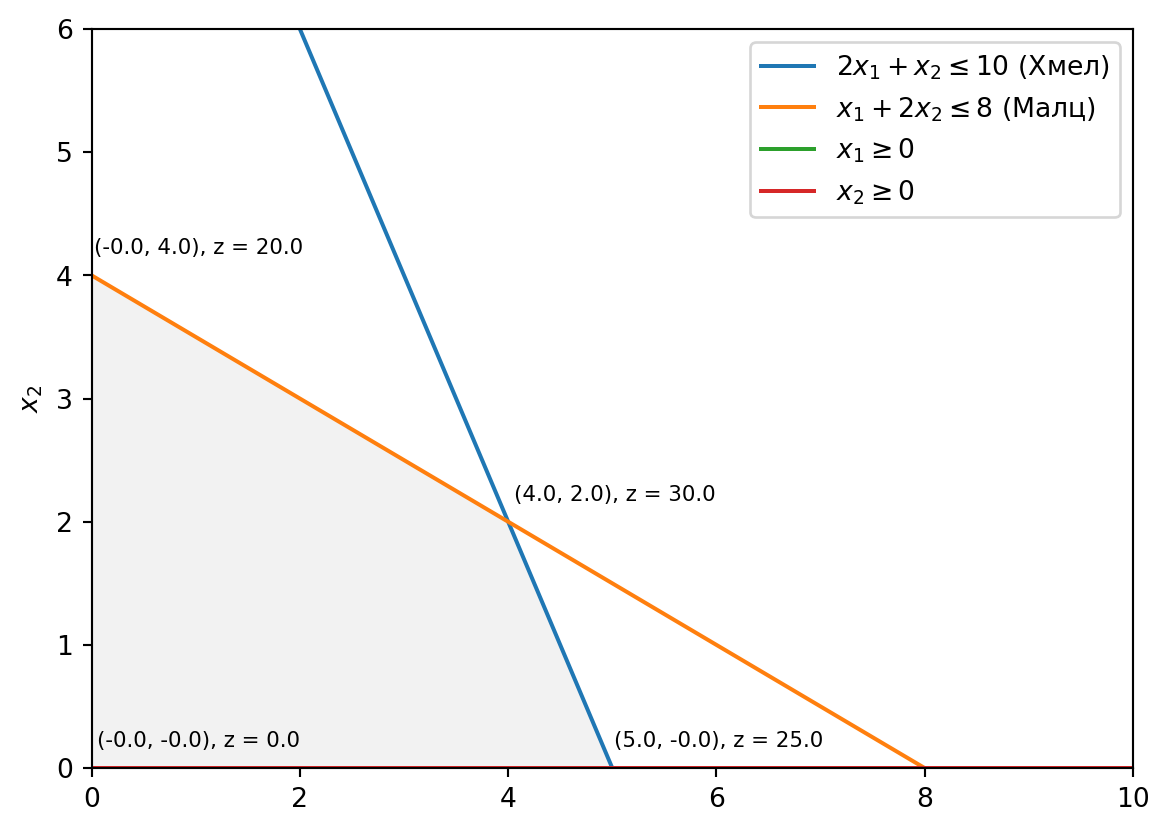

In [1]:
#| label: fig-feasible-region
#| fig-cap: "Допустимо множество и стойност на целевата функция във върховете му."

import polytope as pc
import numpy as np
from matplotlib import pyplot as plt

A = np.array([[2, 1], [1, 2], [-1, 0], [0, -1]])
b = np.array([10, 8, 0, 0])

P = pc.Polytope(A, b)
P_extr = pc.extreme(P)

# Plot the polytope and its extreme points

fig, ax = plt.subplots()

# Plot the lines of the inequalities

x = np.linspace(-1, 10, 100)

constr_label = [r"$2x_1 + x_2 \leq 10$ (Хмел)",
                r"$x_1 + 2x_2 \leq 8$ (Малц)",
                r"$x_1 \geq 0$",
                r"$x_2 \geq 0$"]

for i in range(A.shape[0]):
    y = (b[i] - A[i, 0] * x) / A[i, 1]
    ax.plot(x, y, label=constr_label[i])


for i, p in enumerate(P_extr):
    z = np.dot(p, np.array([5, 5]))
    ax.annotate(f"({p[0]}, {p[1]}), z = {z}", (p[0], p[1]),
                textcoords="offset points",
                xytext=(40, 8), ha='center', fontsize=8)

# Shade the feasible region

ax.fill_between(x, 0, np.minimum((b[0] - A[0, 0] * x) / A[0, 1],
                                   (b[1] - A[1, 0] * x) / A[1, 1]),
                where=(x >= 0), color='gray', alpha=0.1)

ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

ax.set_label(r"$x_1$")
ax.set_ylabel(r"$x_2$")

ax.legend()

In [2]:
import polytope as pc

А = np.array([
    [2, 1],
    [1, 2],
    [-1, 0],
    [0, -1]
])
b = np.array([10, 8, 0, 0])

P = pc.Polytope(A, b)
vertices = pc.extreme(P)

vertices_x, vertices_y = zip(*vertices)

In [3]:
#| label: fig-beer-objective-3d
#| fig-cap: "Целева функтия и допустимо множество"
#| code-fold: true

# Create a 3d scatter plot for the vertices of the feasible region with plotly

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=vertices_x,
    y=vertices_y,
    z=[0] * len(vertices_x),
    mode='markers+text',
    marker=dict(size=2, color='red'),
    text=[f"({v[0]}, {v[1]}, 0)" for v in vertices],
    textposition="top center"
)])

# Draw lines connecting the vertices

for i in range(len(vertices)):
    x_line = [vertices[i][0], vertices[(i + 1) % len(vertices)][0]]
    y_line = [vertices[i][1], vertices[(i + 1) % len(vertices)][1]]
    z_line = [0, 0]
    fig.add_trace(go.Scatter3d(
        x=x_line,
        y=y_line,
        z=z_line,
        mode='lines',
        line=dict(color='blue', width=2)
    ))

fig.update_layout(
    title="Die Zielfunktion des Kaffeeproblems",
    scene=dict(
        xaxis_title=r"Super (kg)",
        yaxis_title=r"Deluxe (kg)",
        zaxis_title=r"Gewinn (Euro)",
        zaxis=dict(range=[0, 40]),
        aspectmode='cube'
    ),
    showlegend=False
)

# Draw the plane of the objective function

X1 = np.linspace(0, 10, 20)
X2 = np.linspace(0, 10, 20)

X1, X2 = np.meshgrid(X1, X2)
Z = 5 * X1 + 5 * X2

fig.add_trace(go.Surface(
    x=X1,
    y=X2,
    z=Z,
    opacity=0.5,
    colorscale='Viridis'
))

# Draw a plane at level z = 6000

z_plane_1 = 25

fig.add_trace(go.Surface(
    x=X1,
    y=X2,
    z=np.full(X1.shape, z_plane_1),
    opacity=0.2,
    colorscale='Viridis',
    showscale=False
))

# Draw a line at the intersection of the objective plane and the z = 10000 plane
intersection_x_1 = np.linspace(0, 250, 20)
intersection_y_1 = (z_plane_1 - 5 * intersection_x_1) / 5

fig.add_trace(go.Scatter3d(
    x=intersection_x_1,
    y=intersection_y_1,
    z=[z_plane_1] * len(intersection_x_1),
    mode='lines',
    opacity=0.4,
    line=dict(color='red', width=3),
    name='Intersection'
))

# Draw the intersection line on the xy plane

fig.add_trace(go.Scatter3d(
    x=intersection_x_1,
    y=intersection_y_1,
    z=[0] * len(intersection_x_1),
    mode='lines',
    opacity=0.4,
    line=dict(color='red', width=2),
    name='Intersection'
))
fig.update_layout(
    title="Функция на печалба",
    scene=dict(
        xaxis_title=r"Светла бира",
        yaxis_title=r"Тъмна бира",
        zaxis_title=r"Печалба",
        zaxis=dict(range=[0, 32]),
        yaxis=dict(range=[0, 6]),
        xaxis=dict(range=[0, 6]),
        aspectmode='cube'
    ),
    showlegend=False
)

# Draw a plane at the optimal solution z = 12000

z_plane_2 = 30

fig.add_trace(go.Surface(
    x=X1,
    y=X2,
    z=np.full(X1.shape, z_plane_2),
    opacity=0.2,
    colorscale='Viridis',
    showscale=False
))

intersection_x = np.linspace(0, 250, 20)
intersection_y = (z_plane_2 - 5 * intersection_x) / 5

# Draw the intersection line on the xy plane

fig.add_trace(go.Scatter3d(
    x=intersection_x,
    y=intersection_y,
    z=[z_plane_2] * len(intersection_x),
    mode='lines',
    opacity=0.4,
    line=dict(color='red', width=3),
    name='Intersection'
))
fig.add_trace(go.Scatter3d(
    x=intersection_x,
    y=intersection_y,
    z=[0] * len(intersection_x),
    mode='lines',
    opacity=0.4,
    line=dict(color='red', width=3),
    name='Intersection'
))

fig.show()


Тази система уравнения има две уравнения и четири променливи ($x_1, x_2, s_1, s_2$) и по тази причина има безкрайно много решения. Ако фиксираме две от променливите и ги сложим да са равни на нула,
бихме могли да намерим решение на системата уравнения.

:::{.callout-important}
## Базисни променливи

За да намерим решение на системата уравнения, фиксираме част от променливите да са равни на нула (брой променливи - брой уравнения = 2) и решаваме за останалите променливи. Защо не фиксираме частта от променливите да са равни на други стойности, например можем да фиксираме
$x_1 =2, x_2 = 1$ и пак ще намерим решение за $s_1$ и $s_2$. По този начин обаче ще намерим **вътрешна** точка от допустимото множество.
Точката $x_1 = 2, x_2 = 1$ не се намира на ръба на допустимото множество (@fig-feasible-region) и следователно не може да е оптималния производствен план.

:::

Когато всички ограничения са неравенства са всички от вида по-малко от $\leq$, какъвто е случая на тази задача, лесно можем да намерим едно решение,
като сложим хиксовете да са равни на нула: $x_1 = 0, x_2 = 0$. Тогава можем да решим за останалите две променливи: $s_1$ и $s_2$. Това първоначално решение наричаме начален опорен план (връх на допустимото множество).
Променливите, които сме фиксирали да са равни на нула наричаме **небазисни** променливите, а останалите наричаме **базисни**. 

$$
\begin{align*}
s_1 + (2x_1 + x_2) = 10\\
s_2 + (x_1 + 2x_2) = 8\\
\end{align*}
$${#eq-bier-restr}

или еквивалентно:

$$
\begin{align*}
s_1 = 10 - (2x_1 + x_2)\\
s_2 = 8 - (x_1 + 2x_2)\\
\end{align*}
$$

Tъй като изразите включващи $x_1$ и $x_2$ са равни на нула във върха, който разглеждаме в момента, от тази система лесно виждаме на колко са равни базисните променливи.

$$
\begin{align*}
s_1 = 10 \\
s_2 = 8 \\
\end{align*}
$$

Върха, в който се намира алгоритъмът в момента е $(x_1 = 0, x_2 = 0, s_1 = 10, s_2 = 8)$. Във @fig-feasible-region това е точката (0, 0) или с други думи това е производствен план, в който фирмата не произвежда нищо. $s_1 = 10$ означава, че в този производствен план фирмата разполага с 10 неизползвани единици хмел. $s_2 = 8$ означава, че фирмата разполага с 8 неизползвани единици малц.

Същото можем да направим и с целевата функция:

$$
\begin{align*}
Z = 0 - (-5x_1 - 5x_2)
\end{align*}
$${#eq-bier-obj}


| Итерация 1   |       |                        |          |          |       |       |            |
|---------|---------|----------|---------|---------|---------|---------|---------|
|             |       | $C_j$                  | 5        | 5        | 0     | 0     |            |
| Базисни пр. | $C_B$ | $X_B$                  | $x_1$    | $x_2$    | $s_1$ | $s_2$ | $X_B/x_1$  |
| $s_1$       | 0     | 10                     | 2        | 1        | 1     | 0     | 10 / 2 = 5 |
| $s_2$       | 0     | 8                      | 1         | 2        | 0     | 1     | 8 / 1 = 8  |
| $Z$         | 0     | $Z_j$                  | 0         | 0        | 0     | 0     |            |
|             |       | $\Delta_j = Z_j - C_j$ | 0 -5 = -5 | 0 -5 = -5 | 0     | 0   |             |


: Първоначална симплекс таблица {#tbl-simplex-1}

където $C_j$ са коефициентите на променливите в целевата функция, $C_B$ са коефициентите на базисните променливи в целевата функция. Редът $Z_j$ получаваме, като образуваме сумата на произведенията на коефициентите на променливите в системата уравнения и коефициентите на базисните променливи в целевата функция. За $x_1$ получаваме: $0 \cdot 2 + 0 \cdot 1 = 0$. Индексната оценка на $x_1$ получаваме, като от $Z_j$ извадим коефициента на $x_1$ в целевата функция: $\Delta_j = Z_j - C_j = 0 - 5 = -5$. По същия начин изчисляваме индексните оценки и на останалите променливи. Обърнете внимание, че тези индексни оценки съответстват на коефициентите на не-базисните променливи в целевата функция в @eq-bier-obj. Стойността на целевата функция получаваме, като съберем произведението на $X_B$ и $C_B$: $10 \cdot 0 + 8 \cdot 0 = 0$.

Индексните оценки ни показват с колко би се променила целевата функция, ако увеличим променливата с една единица. **Отрицателни** индексни оценки означават **увеличение** на целевата функция. В настоящия пример индексните оценки са отрицателни за $x_1$ и $x_2$, което означава, че печалбата на фирмата би нараснала, ако увеличим производството на светла или тъмна бира. Тъй като нарастването на печалбата е еднакво и за двата продукта избираме (произволно) да увеличим $x_1$.


:::{.callout-important}

Във всяка стъпка на симплекс алгоритъма променяме **само една** небазисна променлива. В настоящата стъпка увеличаваме $x_1$, т.е. от нула тя става положителна, но другата небазисна променлива ($x_2$) остава равна на нула.
:::

Въпросът сега е с колко най-много можем да увеличим производството на светла бира без да нарушаваме ограниченията. Отговор на този въпрос ни дава колонката $X_B / x_1$. Най-малката стойност в тази колонка е 5, което означава, че можем да увеличим $x_1$ най-много до 5. За да се убедим, че това е така, можем да заместим с $x_1 = 8$ в първото уравнение от системата [-@eq-bier-restr]:

$$
s_1 = 10 - (2 \cdot 8 + \underbrace{x_2}_{=0}) = -6
$$

Това уравнение е изпълнено за $s_1 = -6$, но това нарушава ограничението за неотрицателност на $s_1$. Избрахме да увеличим $x_1$ от $0$ в настоящото решение на 5, т.е. $x_1$ става базисна променлива. Видяхме, че най-малката стойност на $X_B / x_1$ е в първия ред на таблицата, който съответства на $s_1$. Това означава, че $s_1$ излиза от базиса и в следващото решение на системата ще е нула, а на нейно място в базиса влиза $x_1$.

$$
s_1 = 10 - (2 \cdot 5 - \underbrace{x_2}_{= 0}) \implies s_1 = 0.
$$

За да видим дали върхът $(x_1 = 5, x_2 = 0, s_1 = 0, s_2 = 4)$ е оптимален, изразяваме всяка базисна променлива ($x_1$ и $s_2$), както и целевата функция отново с не-базисни променливи, като искаме всяка базисна променлива да присъства само в едно уравнение и там коефициентът й да е 1. Във @fig-feasible-region това е точката (5, 0), в която производствения план е 5 единици светла бира, никакво производство на 
тъмна бира.  $s_1$ е нула, т.е. хмелът е напълно изчерпан, а $s_2$ е 4, т.е. остават 4 единици малц.

:::{.callout-note}
## Привеждане на системата в базисен вид

След като сме решили коя небазисна променлива ще влезе в базиса (множеството от базисни променливи) и на мястото на коя, искаме да изразим системата уравнения в базисен вид:

- всяка базисна променлива само в едно уравнение
- в него с коефициент 1

:::

$$
\begin{align*}
s_1 & = 10 - 2x_1 - x_2\\
s_2 & = 8 - x_1 - 2x_2\\
\end{align*}
$$

Тук можем да разделим първото уравнение на 2, за да получим коефициент 1 пред $x_1:

$$
\begin{align*}
\frac{s_1}{2} & = 5 - x_1 - \frac{x_2}{2}\\
s_2 & = 8 - x_1 - 2x_2\\
\end{align*}
$$

Втората ни стъпка е да елиминираме $x_1$ във второто уравнение. За целта можем да извадим първото уравнение от второто:

$$
\begin{align*}
\frac{s_1}{2} & = 5 - x_1 - \frac{x_2}{2}\\
s_2 - \frac{s_1}{2} & = 8 - 5 - 0 - 2x_2 + \frac{x_2}{2}\\
\end{align*}
$$


:::{.callout-note}
## Системата уравнения в базисен вид след първата стъпка

Най-накрая, системата в базисен вид (всяка базисна променлива само в едно уравнение и в него с коефициент 1) е:

$$
\begin{align*}
x_1 + \left(\frac{1}{2}x_2 + \frac{1}{2}s_1 \right)= 5\\
s_2 + \left(\frac{3}{2}x_2 -\frac{1}{2}s_1 \right) = 3
\end{align*}
$${#eq-bier-basis-1}

Изразяваме и целевата функция само с небазисни променливи, което в случая означава да заместим
$x_1$ в предишното й представяне ($z = 0 - (-5x_1 - 5x_2)$).

$$
\begin{align*}
& z = 5 - \left(5 - \frac{1}{2}s_1 - \frac{1}{2}x_2\right) + 5x_2 \implies \\
& z = 25 - \left(- \frac{5}{2} x_2 + \frac{5}{2}s_1 \right)
\end{align*}
$${#eq-bier-basis-obj-1}

:::



При трансформирането на @tbl-simplex-1 в @tbl-simplex-2 правим абсолютно същото. Разделяме реда $x_1$ на $2$ (коефициентът пред $x_1$) и след това изваждаме първия ред от втория ред, за да елиминираме $x_1$ от втория ред. В крайна
сметка коефициентите в таблицата трябва да съответстват на коефициентите в системата уравнения -@eq-bier-basis-1, a стойностите на индексните оценки ($\Delta_j$) да съответстват на коефициентите в целевата функция -@eq-bier-basis-obj-1.


| Итерация 2  |       |            |       |       |       |       |                |
|-------------|-------|------------|-------|-------|-------|-------|----------------|
|             |       | $C_j$      | 5     | 5     | 0     | 0     |                |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ | $X_B/x_2$      |
| $x_1$       | 5     | 5          | 1     | 1/2   | 1/2   | 0     | 5 / (1/2) = 10 |
| $s_2$       | 0     | 3          | 0     | 3/2   | -1/2  | 1     | 3 / (3/2) = 2  |
| $Z$         | 25    | $Z_j$      | 5     | 5/2   | 5/2   | 0     |                |
|             |       | $\Delta_j$ | 0     | -5/2  | 5/2   | 0     |                |

: Симплекс таблица след първата итерация {#tbl-simplex-2}

От индексните оценки виждаме, че планът $(x_1 = 5, x_2 = 0, s_1 = 0, s_2 = 3)$ не е оптимален, защото $x_2$ не е базисна променлива с отрицателна индексна оценка. Най-голямото възможно увеличение на $x_2$ е 2 (втори ред), следователно $x_2$ влиза в базиса на мястото на $s_2$.

:::{.callout-important}
## Интерпретация на индексните оценки

Нека да погледнем как сме изчислили индексната оценка на $x_2 = 5/2$. Първата част
от изчислението е $Z_j = 5 \cdot 1/2 + 0 \cdot 3/2 = 5/2$. Уравненията -@eq-bier-basis-1 ни дават 
ключ към това да разберем какво представлява $Z_j$. Върхът на допустимото множество, в който се намираме в момента е $(x_1 = 5, x_2 = 0, s_1 = 0, s_2 = 3)$ и тъй като всичката ни наличност на хмел в този производствен
план е вече предназначен за производството на светла бира, не можем просто да започнем да произвеждаме тъмна бира (да увеличим $x_2$ от нула в момента до някаква положителна стойност), защото нямаме свободен хмел за това. За да можем да започнем производство на тъмна бира ще трябва да намалим производството на светлата бира, за да освободим хмел. 


Коефициентът $1/2$ в таблицата ни казва от колко единици светла бира трябва да се лишим, за да можем да произведем една единица тъмна бира. Това се вижда и от първото уравнение в [-@eq-bier-basis-1]. В настоящия производствен план (връх) $x_1 = 5, x_2 = 0, s_1 = 0$

$$
\underbrace{x_1}_{=5} + \left(\frac{1}{2}\underbrace{x_2}_{=0}+ \frac{1}{2}\underbrace{s_1}_{=0} \right)= 5
$$

Ако не променим нищо друго, а сложим $x_1 = 1$, то уравнението няма да е изпълнено

$$
5 + \left(\frac{1}{2} + \frac{1}{2} 0 \right) = 5.5 \neq 5
$$

По тази причина трябва или $x_1$ от 5 да стане (5 - 1/2 = 4.5), или $s_1$ от 0 да стане (0 - 1/2 = -1/2). $s_1$ не може да стане отрицателна, така че остава само първата възможност.

Тъй като в момента печалбата ни се формира от продажбата на светла бира, намаленото й производство е свързано с **пропуснати ползи** равни на намаленото количество (1/2) умножено по печалбата от единица светла бира (5).

Аналогично е разсъждението и за второто произведение в изчислението на $Z_j$ за $x_2$. Единствената разлика е, че тъй като малцът има коефициент нула в целевата функция, не губим печалба, когато намалим $s_2$, т.е. количеството 
свободен малц.

За да стигнем до индексната оценка $\Delta_j$ от общите пропуснати ползи изваждаме печалбата от единица тъмна бира (5). Ако печалбата от тази единица надхвърля пропуснатите ползи, тогава $\Delta_j < 0$.
:::

Преобразуваме системата уравнения [-@eq-bier-basis-1], така че новите базисни променливи да присъстват само в по едно уравнение и в него да имат коефициент  $1$ и изразяваме целевата функция с небазисните променливи:

$$
\begin{align*}
& x_1 = 5 - \frac{1}{2}s_1 - \frac{1}{2}x_2 \\
& x_2 = \frac{3}{1.5} + \frac{1}{2\cdot 1.5}s_1 - \frac{1}{1.5}s_2
\end{align*}
$$

$$
\begin{align*}
x_1 & = 5 - \frac{1}{2}s_1 - \frac{1}{2}\left(2 + \frac{1}{3}s_1 - \frac{1}{1.5}s_2\right) \\
x_2 & = 2 + \frac{1}{3}s_1 - \frac{1}{1.5}s_2
\end{align*}
$$

:::{.callout-note}
## Системата уравнения в базисен вид след втората стъпка

$$
\begin{align*}
x_1 + (\frac{2}{3}s_1 - \frac{1}{3}s_2) & = 4\\
x_2 + (-\frac{1}{3}s_1 + \frac{1}{1.5}s_2) & = 2
\end{align*}
$${#eq-bier-basis-2}

Изразяваме целевата функция само с небазисни променливи: 

$$
\begin{align*}
z = 25 - \frac{5}{2}s_1 + 2.5\left(\frac{1}{3}s_1 - \frac{1}{1.5}s_2\right)\\
z = 30 - (1.66s_1 + 1.66s_2)
\end{align*}
$${#eq-bier-basis-obj-2}

:::

При преобразуването на таблица @tbl-simplex-2 в @tbl-simplex-3 правим абсолютно същото. Разделяме реда $x_2$ на $3/2$ (коефициентът пред $x_2$). След това искаме да елиминираме 
$x_2$ от реда на $x_1$. Това можем да направим, като от първото уравнение извадим второто уравнение, умножено по $1/2$. В крайна сметка трябва да получим същите коефициенти в 
таблицата, както и в системата уравнения [-@eq-bier-basis-2], а стойностите на индексните оценки ($\Delta_j$) да съответстват на коефициентите в целевата функция -@eq-bier-basis-obj-2.

| Итерация 3  |       |            |       |       |       |       |     |
|-------------|-------|------------|-------|-------|-------|-------|-----|
|             |       | $C_j$      | 5     | 5     | 0     | 0     |     |
| Базисни пр. | $C_B$ | $X_B$      | $x_1$ | $x_2$ | $s_1$ | $s_2$ |     |
| $x_1$       | 5     | 4          | 1     | 0     | 2/3   | -1/3  |     |
| $x_2$       | 5     | 2          | 0     | 1     | -1/3  | 2/3   |     |
| $Z = 30$    |       | $Z_j$      | 5     | 5     | 1.667 | 1.667 |     |
|             |       | $\Delta_j$ | 0     | 0     | 1.667 | 1.667 |     |

: Последна симплекс таблица {#tbl-simplex-3}

Планът е оптимален, защото няма небазисни променливи с отрицателни индексни оценки. Така получаваме, че решението на оптимизационната задача е: $(x_1 = 4, x_2 = 2, s_1 = 0, s_2 = 0)$ при стойност на целевата функция $Z^{*} = 30$. Дефицитни са и двата ресурса: $s_1 = 0$, $s_2 = 0$.
